**[matplotlib学习笔记(I)](https://matplotlib.org/stable/tutorials/introductory/index.html#introductory)**  
@author: Rui Zhu  
@creation time: 2023-02-03  
@cite:  
    1. [matplotlib官方教程](https://matplotlib.org/stable/tutorials/index.html)  
    2. [官方推荐的第三方示例](https://matplotlib.org/stable/users/resources/index.html#tutorials)  
@note:  
    1. 本笔记只是过一遍官方手册，详细信息还是需要查看网站上的对应内容

In [1]:
from pathlib import Path
dir_material = Path("/Users/rui/Code/1_Astronote/04_matplotlib/material")
dir_output = Path("/Users/rui/Code/1_Astronote/04_matplotlib/output")

# 1. [Quick start guide](https://matplotlib.org/stable/tutorials/introductory/quick_start.html)

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
import numpy as np

## 1.1 matplotlib中的基本概念
* Figure(图布): 画图用的所有元素都画在figure上
* Axes(标架): 画具体图的地方
* Axis(坐标轴): 单个坐标轴对象
* Artist: 任何可以看见的都视为艺术家, 甚至是Figure, Axes...

## 1.2 创建Figure的方法

In [3]:
# 方法1: 创建一个空的figure, 而没有创建axes
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

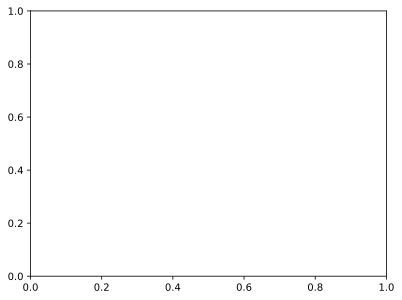

In [4]:
# 方法2: 同时创建figure和axes
fig, ax = plt.subplots()

## 1.3 两种使用matplotlib的风格

风格1: 明确的 _面向对象风格_
* 推荐用这个

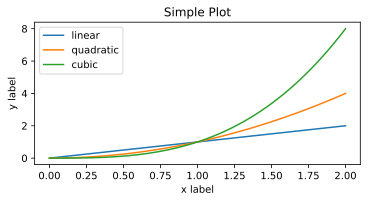

In [5]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

风格2: 简单的 _plt简约风_
* 简单画图使用

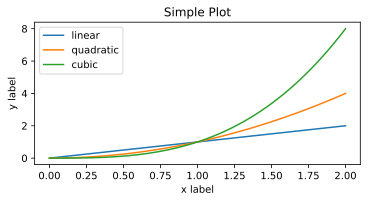

In [6]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend();

## 1.4 创建画图函数用于重复作图

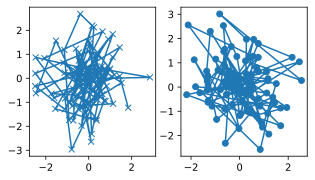

In [7]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'});

## 1.5 个性化设置
* axes的画图函数中有各种自定义的参数设置
* 也可以用面向对象的方法设置

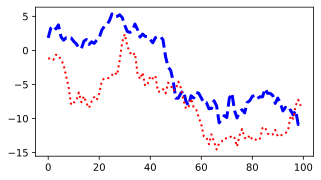

In [8]:
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':')  # 面向对象的方法设置
l.set_color("red")

## 1.6 [图中的说明文字](https://matplotlib.org/stable/tutorials/introductory/quick_start.html#labelling-plots)

坐标轴名称, 图标题

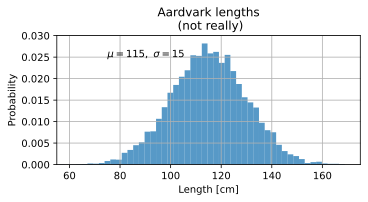

In [9]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')

# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True);

使用数学公式
* r的含义: 将字符串中的TeX字符\不视为python中的转义字符

Text(0.5, 1.0, '$\\sigma_i=15$')

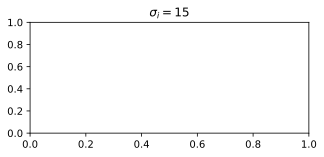

In [10]:
fig, ax = plt.subplots(figsize=(5, 2))
ax.set_title(r'$\sigma_i=15$')

注释

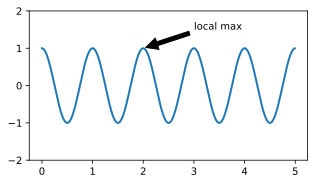

In [11]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2);

图例

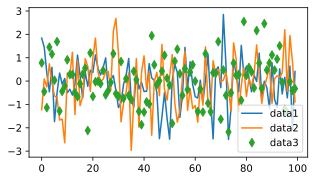

In [12]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend();

## 1.7 坐标轴设置

设置坐标轴scales

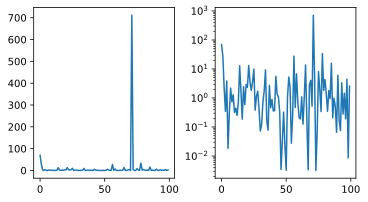

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout='constrained')
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data);

设置刻度线和刻度值

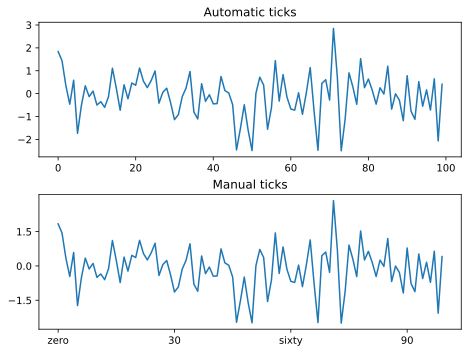

In [14]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title('Manual ticks');

图像数据中含有时间或字符串

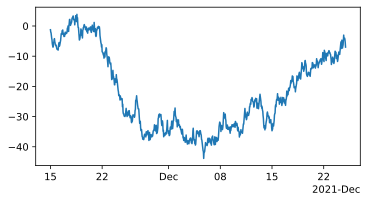

In [15]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                  np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)

# * 以下两行是matplotlib对时间格式化的操作，用到再看
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf);

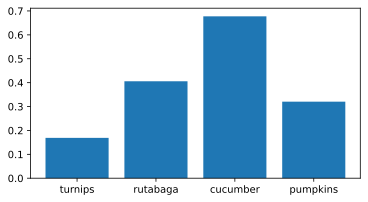

In [16]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
categories = ['turnips', 'rutabaga', 'cucumber', 'pumpkins']

ax.bar(categories, np.random.rand(len(categories)));

[添加新的坐标轴](https://matplotlib.org/stable/tutorials/introductory/quick_start.html#additional-axis-objects)

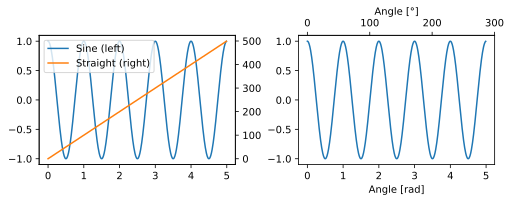

In [17]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 2.7), layout='constrained')
l1, = ax1.plot(t, s)
ax2 = ax1.twinx()  # * 在与ax1共用x轴的位置上创建新的ax2
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [rad]')
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [°]');

## 1.8 [有颜色映射的数据](https://matplotlib.org/stable/tutorials/introductory/quick_start.html#color-mapped-data)

In [18]:
# * 创建一个3维数据进行演示
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, layout='constrained')
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma',
                          norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()');

## 1.9 [创建多子图](https://matplotlib.org/stable/tutorials/introductory/quick_start.html#additional-axis-objects)

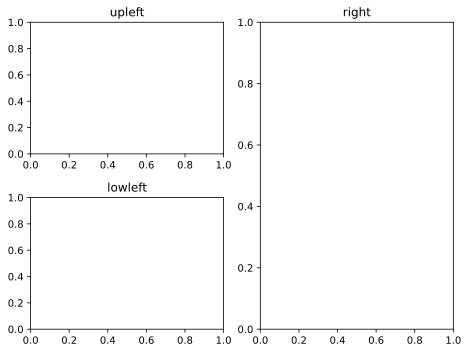

In [19]:
fig, axd = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']], layout='constrained')
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right');

# 2. [Pyplot tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)

## 2.1 pyplot简介
* matplotlib.pyplot是使matplotlib向MATLAB一样画图的函数集合

全能函数plot

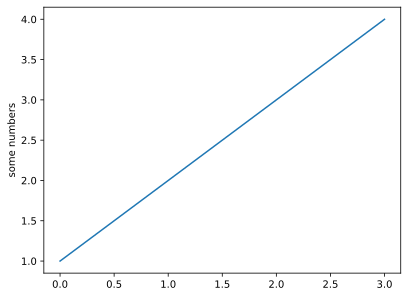

In [20]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

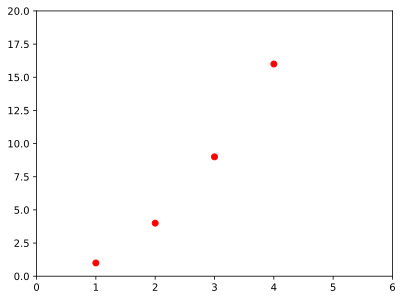

In [21]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])  # * 设置坐标轴范围[xmin, xmax, ymin, ymax]
plt.show()

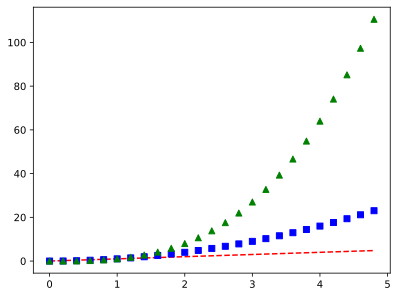

In [22]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')  # * 一次绘制多个数据
plt.show()

[plot函数允许使用关键字绘图](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#plotting-with-keyword-strings)
* 有关键字的数据类型: dict, DataFrame

In [23]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100
type(data)

dict

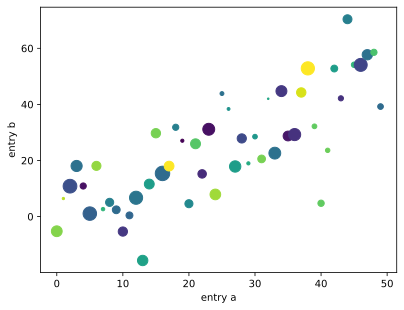

In [24]:
plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

[使用类别字符串画图](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#plotting-with-categorical-variables)

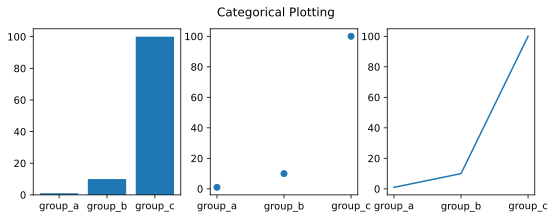

In [25]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

## 2.2 [属性设置](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#controlling-line-properties)

方法1: 关键字形参

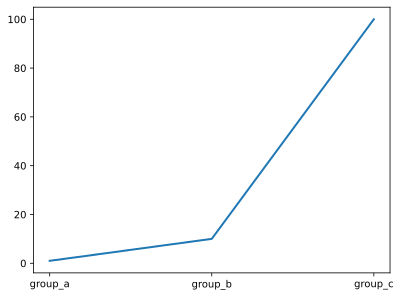

In [26]:
plt.plot(names, values, linewidth=2.0);

方法2: 面向对象方法

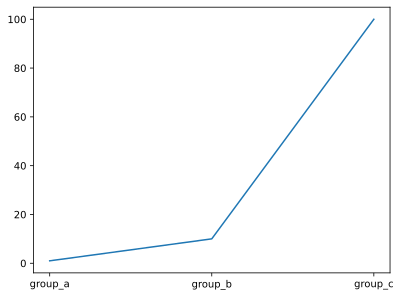

In [27]:
line, = plt.plot(names, values, '-')
line.set_antialiased(False) # turn off antialiasing

方法3: setp函数

[None, None, None, None]

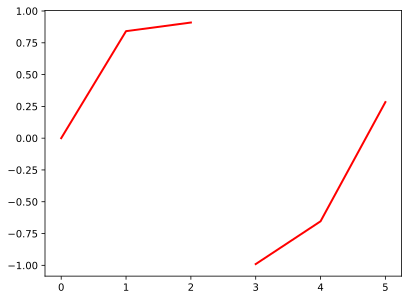

In [28]:
x1 = [0, 1, 2]
x2 = [3, 4, 5]
y1 = np.sin(x1)
y2 = np.cos(x2)
lines = plt.plot(x1, y1, x2, y2)
# setp函数的关键字风格
plt.setp(lines, color='r', linewidth=2.0)

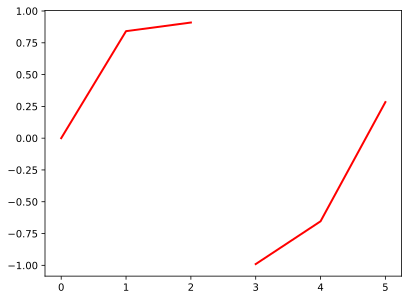

In [29]:
# setp函数的MATLAB风格
lines = plt.plot(x1, y1, x2, y2)
plt.setp(lines, 'color', 'r', 'linewidth', 2.0);

使用setp函数查看可以设置的属性

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

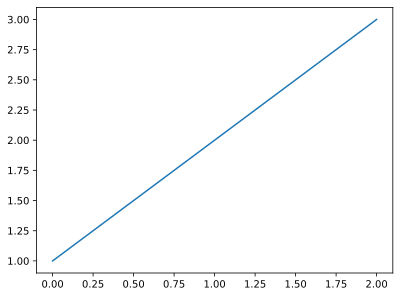

In [30]:
lines = plt.plot([1, 2, 3])

plt.setp(lines)

## 2.3 多个子图

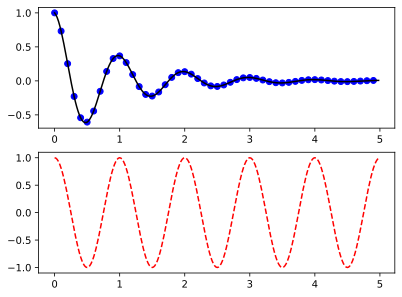

In [31]:
# 1个figure里多个axes
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()  # * 可以不写, 会自动创建
plt.subplot(211)  # * 2行1列中的第1个图
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)  # * 2行1列中的第2个图
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

Text(0.5, 1.0, 'Easy as 1, 2, 3')

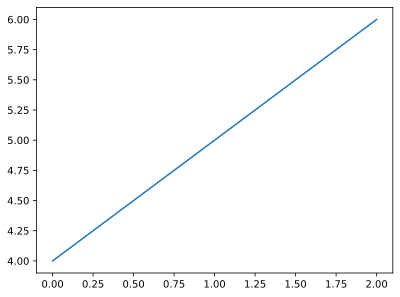

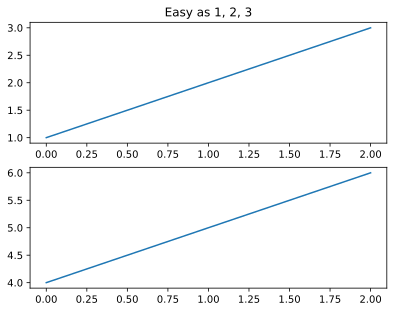

In [32]:
# 创建多个figure
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot() by default

plt.figure(1)                # first figure current;
#                              # subplot(212) still current
plt.subplot(211)             # make subplot(211) in the first figure
#                              # current
plt.title('Easy as 1, 2, 3') # subplot 211 title

## 2.4 [使用文本](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#working-with-text)

文本注释

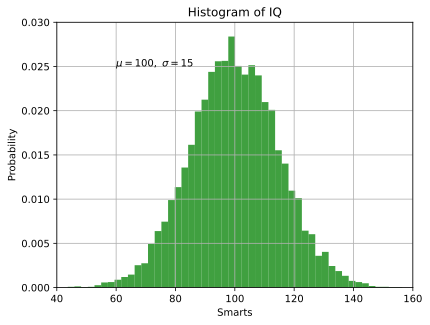

In [33]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

数学表达式

Text(0.5, 1.0, '$\\sigma_i=15$')

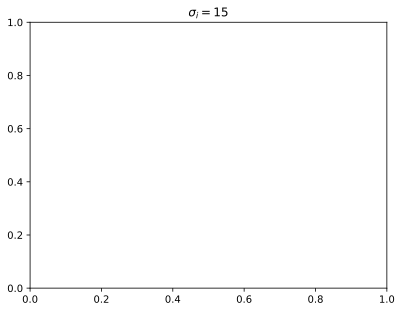

In [34]:
plt.title(r'$\sigma_i=15$')

[箭头注释](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#annotating-text)

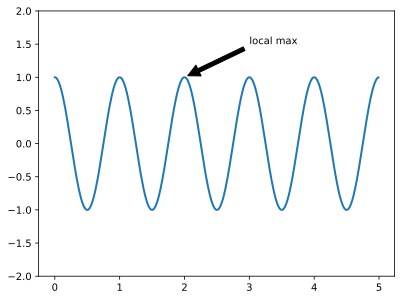

In [35]:
ax = plt.subplot()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
# xy是标注点的坐标
# xytext是注释文字的位置

plt.ylim(-2, 2)
plt.show()

## 2.5 [调整坐标轴scales](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#logarithmic-and-other-nonlinear-axes)
* 多用于数据分布跨越多个数量级的情况

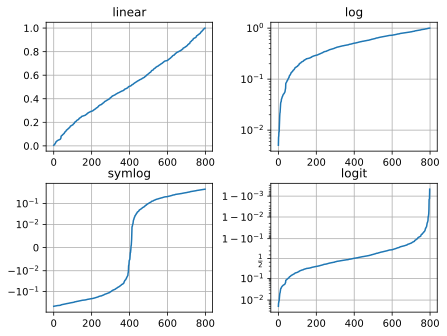

In [36]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the open interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

# 3. [Image tutorial](https://matplotlib.org/stable/tutorials/introductory/images.html)

In [37]:
# 演示用图
path_img = "/Users/rui/Code/1_Astronote/04_matplotlib/material/stinkbug.png"

## 3.1 [导入图像数据为数组](https://matplotlib.org/stable/tutorials/introductory/images.html#importing-image-data-into-numpy-arrays)

In [38]:
import matplotlib.image as mpimg
img = mpimg.imread(path_img)
img.shape # 3维数组, RGB image

(375, 500, 3)

## 3.2 查看图像

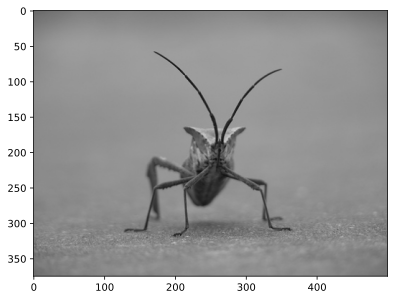

In [39]:
imgplot = plt.imshow(img)

使用伪彩色
* 默认的cmap='viridis'

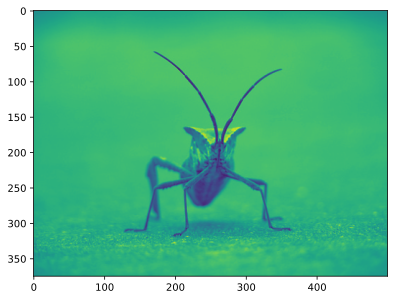

In [40]:
lum_img = img[:, :, 0]
plt.imshow(lum_img);

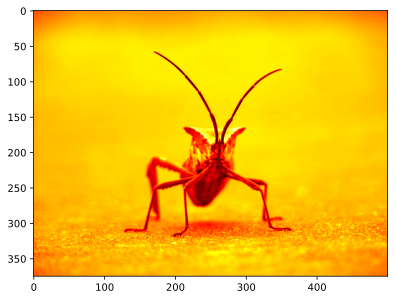

In [41]:
plt.imshow(lum_img, cmap='hot');

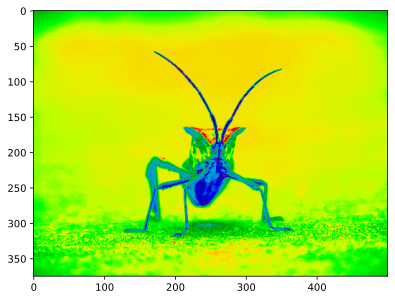

In [42]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')  # 单独设置cmap

添加colorbar用于颜色参考

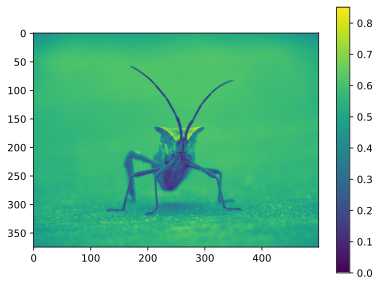

In [43]:
imgplot = plt.imshow(lum_img)
plt.colorbar()

使用直方图查看像素值分布

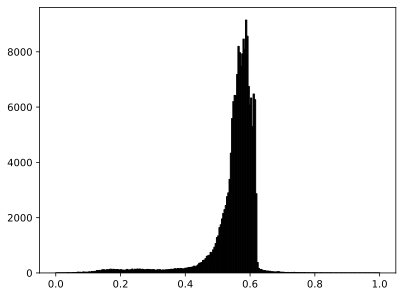

In [44]:
plt.hist(lum_img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k');

## 3.3 图像操作

截断无效信息
* 示例图像的直方图中看出大于0.7的像素非常少
* 可以截断0.7以上的像素, 提高颜色映射的对比度

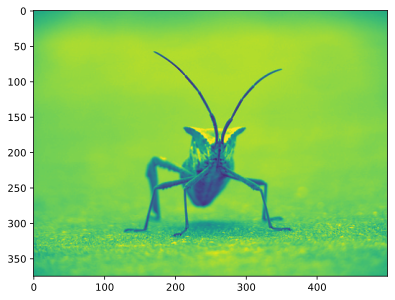

In [45]:
imgplot = plt.imshow(lum_img, clim=(0.0, 0.7))

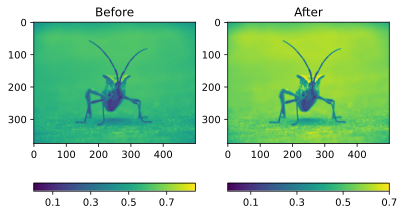

In [46]:
fig = plt.figure()

ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(lum_img)
ax.set_title('Before')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(lum_img)
imgplot.set_clim(0.0, 0.7)
ax.set_title('After')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

[数组的差值方案](https://matplotlib.org/stable/tutorials/introductory/images.html#array-interpolation-schemes)  
* 差值的作用在于调整像素值(颜色)和像素的映射“应该是什么样”
* 使得展示的映射包含更多的有用信息
* 相比于像素化, 人们更希望图像模糊

新图像的shape: (48, 64, 3)


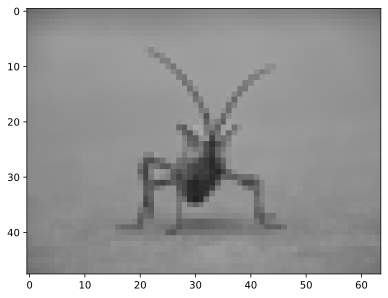

In [47]:
# 使用Pillow library压缩图像
from PIL import Image

img = Image.open(path_img)
img.thumbnail((64, 64))  # resizes image in-place
img = np.array(img)
print(f"新图像的shape: {img.shape}")
imgplot = plt.imshow(img)

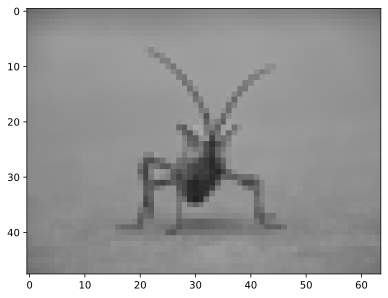

In [48]:
imgplot = plt.imshow(img, interpolation="nearest")

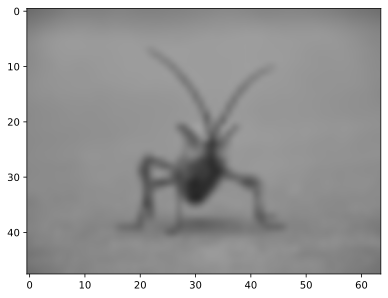

In [49]:
# bicubic差值是常用的图像模糊方案
imgplot = plt.imshow(img, interpolation="bicubic")

# 4. [绘图的完整流程](https://matplotlib.org/stable/tutorials/introductory/lifecycle.html#the-lifecycle-of-a-plot)

## 4.1 获取数据
* 一些公司的销售数据
* 可以用条形图进行可视化

In [50]:
data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

## 4.2 选择合适的图类型进行可视化

<BarContainer object of 10 artists>

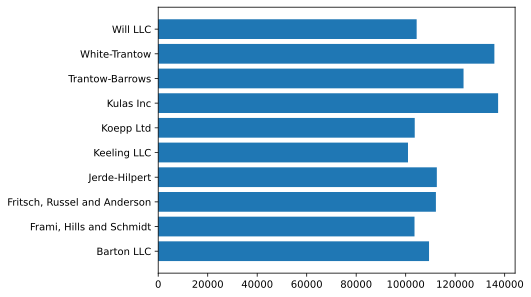

In [51]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

## 4.3 管理绘图风格

In [52]:
print(plt.style.available)  # * 查看可选的绘图风格

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'bright', 'cjk-jp-font', 'cjk-kr-font', 'cjk-sc-font', 'cjk-tc-font', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'grid', 'high-contrast', 'high-vis', 'ieee', 'latex-sans', 'light', 'muted', 'nature', 'no-latex', 'notebook', 'pgf', 'retro', 'sans', 'scatter', 'science', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'std-colors', 'tableau-colorblind10', 'vibrant']


In [53]:
# 选择一款风格
plt.style.use('fivethirtyeight')

<BarContainer object of 10 artists>

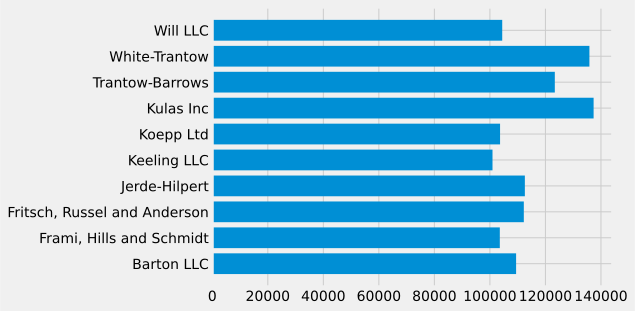

In [54]:
# 选择的风格将影响之后的绘图
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

## 4.4 精细调整
* 发现x-label有点拥挤, 可以旋转一些角度

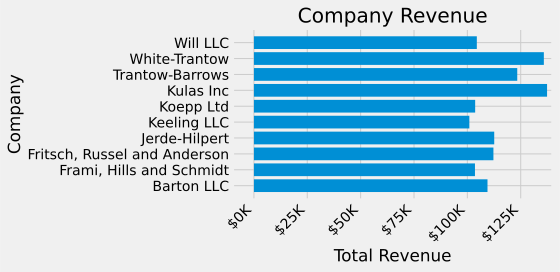

In [55]:
def currency(x, pos):
    """The two arguments are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

plt.rcParams.update({'figure.autolayout': True})  # 自动排版

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(group_names, group_data)

labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(currency)

## 4.5 组合多个可视化在一个图中

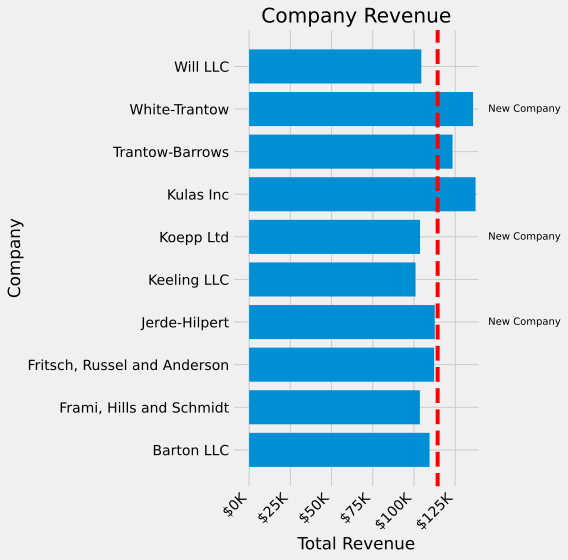

In [56]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

# Add a vertical line, here we set the style in the function call
ax.axvline(group_mean, ls='--', color='r')

# Annotate new companies
for group in [3, 5, 8]:
    ax.text(145000, group, "New Company", fontsize=10,
            verticalalignment="center")

# Now we move our title up since it's getting a little cramped
ax.title.set(y=1.05)

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(currency)
ax.set_xticks([0, 25e3, 50e3, 75e3, 100e3, 125e3])
fig.subplots_adjust(right=.1)

plt.show()

## 4.6 保存图片

In [57]:
# 支持的图片格式
print(fig.canvas.get_supported_filetypes())

{'eps': 'Encapsulated Postscript', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'ps': 'Postscript', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format', 'webp': 'WebP Image Format'}


In [58]:
# tarnsparent=True: 使图像的背景透明
# dpi=500: 分辨率(每平方英尺的点数), 实测500就足够了, 再高变化不大
# bbox_inches="tight": 裁剪图像的空白边缘
fig.savefig(dir_output / 'sales.png', transparent=False, dpi=500, bbox_inches="tight")

# 5. [使用style sheets和rcParams来自定义绘图风格](https://matplotlib.org/stable/tutorials/introductory/customizing.html)
* Matplotlib提供3种方式自定义绘图风格
    1. 设置rcParams(只对当前程序生效)
    2. 编写style sheets(样式表)
    3. 修改matplotlibrc file
* 优先级:  
    rcParams > style sheets > matplotlibrc file

## 5.1 [设置rcParams](https://matplotlib.org/stable/tutorials/introductory/customizing.html#runtime-rc-settings)

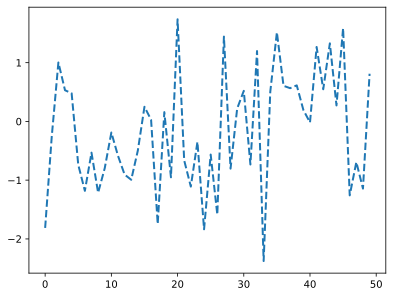

In [59]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')  # 回复成默认风格
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'

data = np.random.randn(50)
plt.plot(data);

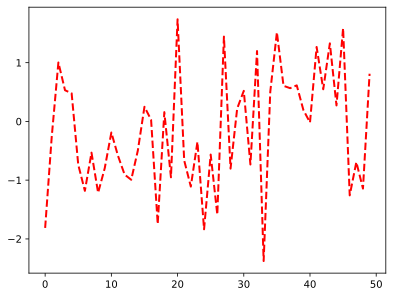

In [60]:
# 修改颜色轮转顺序
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y'])
plt.plot(data)  # first color is red

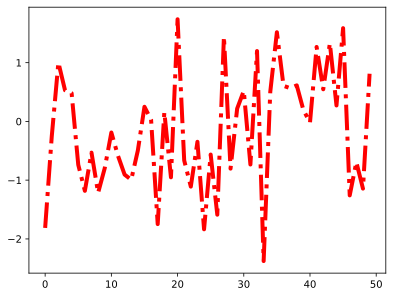

In [61]:
# 使用关键字, 修改一组中的多个关键字参数
mpl.rc('lines', linewidth=4, linestyle='-.')
plt.plot(data)

## 5.2 [局域生效rcParams](https://matplotlib.org/stable/tutorials/introductory/customizing.html#temporary-rc-settings)